# Esercizio 6

Scrivere ed eseguire un programma C che generi, con una simulazione Monte Carlo (metodo Box-Muller) in singola precisione, 10 misure di potenzadissipata da un resistore di R= 100Ω, rilevate con un wattmetro di precisione 6%, in funzione della tensione ai suoi capi misurata con un voltmetrocon precisione 3% a partire da 0.1 V e con un passo di 0.1 V.

Fornire, su due files distinti:
1. il sorgente del programma (e6cognomenome.c)
2. le risposte ai seguenti quesiti (e6cognomenome.txt)

(a) tabulare le 10 coppie di misure e il valore di resistenza corrispondente 

(b) calcolare la resistenza media, la sua deviazione standard e la deviazione standard della media e verificare la compatibilit ́a dellamedia con il valore nominale di resistenza.

(c) discutere come implementare il fatto che oltre un certo limite ci si aspetta che la anche la resistenza stessa aumenti con il calore e quindi con la tensione

(d) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 2})
np.set_printoptions(suppress=True) #sopprime la notazione scientifica

Proviamo a simulare i dati come sarebbero ottenuti misurando la tensione ai capi di R a partire da 0.1 V con passo di 0.1V

Assumiamo che vengano estratti da una distribuzione descritta dall'equazione: $P = \frac{(V^2)}{R}$ con V = 0.1,0.2,0.3...

Incertezza su P è del 6\% e su V è del 3\%.  


In [2]:
n = 100

np.random.seed(1453497)
R = np.zeros(n)
#Potenza dissipata P = V^2/R nei conduttori ohmnici (resistenza)

R_teorico = 100

alpha = np.arange(0,0.1,0.01)
ddp = np.arange(0.1,0.1*n + 0.1,0.1) #vettore ddp teorico
P = (ddp**2)/R_teorico #vettore potenza teorico
#P = (ddp**2)/(R_teorico*(1+alpha))
#alpha dipende da T

err_ddp = np.zeros(n)
err_P = np.zeros(n)

for i in range(n):
    #voltmetro 3 % supponiamo incertezze gaussiana
    u1,u2 = np.random.rand(2)
    g1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    g2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    #print(g1,g2)
    err_ddp[i] = ddp[i]*0.03
    err_P[i] = P[i]*0.06
    ddp[i] += err_ddp[i]*g1
    P[i] += err_P[i]*g2 
    R[i] = (ddp[i]**2)/P[i]


df = pd.DataFrame(data={'ddp': ddp, 'err_ddp': err_ddp, 'P': P, 'err_P':err_P, 'R': R})
print(df)

          ddp  err_ddp         P     err_P           R
0    0.097323    0.003  0.000099  0.000006   95.731513
1    0.203052    0.006  0.000371  0.000024  111.127809
2    0.302054    0.009  0.000965  0.000054   94.571577
3    0.404802    0.012  0.001377  0.000096  119.009783
4    0.481901    0.015  0.002478  0.000150   93.716638
..        ...      ...       ...       ...         ...
95   9.476713    0.288  0.881546  0.055296  101.875694
96   8.857871    0.291  0.966375  0.056454   81.191935
97   9.470324    0.294  0.957833  0.057624   93.635337
98  10.086587    0.297  0.974627  0.058806  104.387840
99  10.835974    0.300  1.072973  0.060000  109.432676

[100 rows x 5 columns]


In [19]:
n = 10

np.random.seed(1453497)
R = np.zeros(n)
#Potenza dissipata P = V^2/R nei conduttori ohmnici (resistenza)

R_teorico = 100

alpha = np.arange(0,0.1,0.01)
ddp = np.arange(0.1,0.1*n + 0.1,0.1) #vettore ddp teorico
P = (ddp**2)/R_teorico #vettore potenza teorico
#P = (ddp**2)/(R_teorico*(1+alpha))
#alpha dipende da T

err_ddp = np.zeros(n)
err_P = np.zeros(n)

for i in range(n):
    #voltmetro 3 % supponiamo incertezze gaussiana
    u1,u2 = np.random.rand(2)
    g1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    g2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    #print(g1,g2)
    ddp[i] += ddp[i]*0.03*g1
    P[i] += P[i]*0.06*g2 
    err_ddp[i] = ddp[i]*0.03
    err_P[i] = P[i]*0.06
    R[i] = (ddp[i]**2)/P[i]

df = pd.DataFrame(data={'ddp': ddp, 'err_ddp': err_ddp, 'P': P, 'err_P':err_P, 'R': R})
print(df)

        ddp   err_ddp         P     err_P           R
0  0.097323  0.002920  0.000099  0.000006   95.731513
1  0.203052  0.006092  0.000371  0.000022  111.127809
2  0.302054  0.009062  0.000965  0.000058   94.571577
3  0.404802  0.012144  0.001377  0.000083  119.009783
4  0.481901  0.014457  0.002478  0.000149   93.716638
5  0.597992  0.017940  0.003724  0.000223   96.011907
6  0.705581  0.021167  0.004973  0.000298  100.113769
7  0.792860  0.023786  0.006681  0.000401   94.085872
8  0.887472  0.026624  0.008601  0.000516   91.569119
9  0.994663  0.029840  0.009304  0.000558  106.333812


In [25]:
def calcola_err(var, err):
    I_list = var.values
    err_I_list = err.values
    #print(I_list, err_I_list)

    errori_I = np.zeros(n)
    I = np.zeros(n)

    for i in range(n):
        for k in range(1,6):
            approx = round(err_I_list[i], k)
            if approx > 0.:
                #print(i, approx)
                #print("\t", 2/10**k)
                uno = round(err_I_list[i], k+1)
                #print("\t",uno)
                if uno < (2/10**k):
                    errori_I[i] = uno
                    I[i] = round(I_list[i], k+1)
                    break
                #print("\t", approx)
                errori_I[i] = approx
                I[i] = round(I_list[i], k)
                break
    #print(errori_I)
    #print(I)
    return I,errori_I

In [24]:
df_approx = df.copy()
df_approx['ddp'],df_approx['err_ddp'] = calcola_err(df['ddp'],df['err_ddp'])
df_approx['P'],df_approx['err_P'] = calcola_err(df['P'],df['err_P'])
print(df_approx)

     ddp  err_ddp         P     err_P           R
0  0.097    0.003  0.000099  0.000006   95.731513
1  0.203    0.006  0.000370  0.000020  111.127809
2  0.302    0.009  0.000960  0.000060   94.571577
3  0.405    0.012  0.001380  0.000080  119.009783
4  0.482    0.014  0.002480  0.000150   93.716638
5  0.598    0.018  0.003700  0.000200   96.011907
6  0.710    0.020  0.005000  0.000300  100.113769
7  0.790    0.020  0.006700  0.000400   94.085872
8  0.890    0.030  0.008600  0.000500   91.569119
9  0.990    0.030  0.009300  0.000600  106.333812


<ipython-input-23-9db594c45fd2>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.xaxis.set_ticks(np.arange(0, 25),1)  # Set label locations


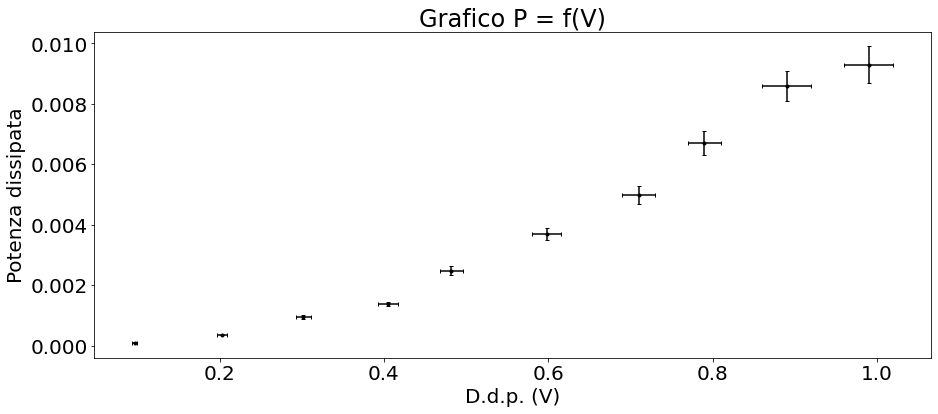

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.set_xlabel('D.d.p. (V)', fontsize = 20)
ax.set_ylabel('Potenza dissipata', fontsize = 20)
ax.xaxis.set_ticks(np.arange(0, 25),1)  # Set label locations
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.errorbar(df_approx['ddp'], df_approx['P'], xerr = df_approx['err_ddp'], yerr = df_approx['err_P'],
             linestyle = "None", fmt = ".k")
plt.title('Grafico P = f(V)', fontsize = 24)
plt.show()

In [17]:
media = np.mean(R)

sd = np.std(R)
sd_media = sd/np.sqrt(10)
print(('La media di R è %10.7f, con sd %10.7f con sd dalla media %10.7f')
      %(media,sd, sd_media))

La media di R è 100.2271800, con sd  8.5670527 con sd dalla media  2.7091399


In [6]:
#per ottenere l'errore massimo moltiplichiamo per 3
media + (sd_media)*3
#è compatibile con 100

109.3349973901792

In [7]:
# Risposta C 
# La R diventa una funzione della V

P = (ddp**2)/(R_teorico*(1+alpha))
# dove alpha è funzione di T
#alpha = coeff.termico [u.m. 1/C°] * T [u.m. C°] quindi è adimensionale

ValueError: operands could not be broadcast together with shapes (100,) (10,) 